In [33]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')



In [57]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2018, 1, 1)

df = web.DataReader('BBCA', 'google', start, end)

print(df.head())

/home/doni/anaconda3/envs/stock-ticker/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


              Open    High     Low   Close    Volume
Date                                                
2010-01-04  4825.0  5050.0  4825.0  5050.0  15562500
2010-01-05  5100.0  5100.0  4950.0  5100.0   8888500
2010-01-06  5100.0  5100.0  4950.0  4950.0   5556500
2010-01-07  4950.0  4975.0  4825.0  4975.0   7726500
2010-01-08  4925.0  4975.0  4850.0  4850.0   5485500


In [58]:
close = df['Close']

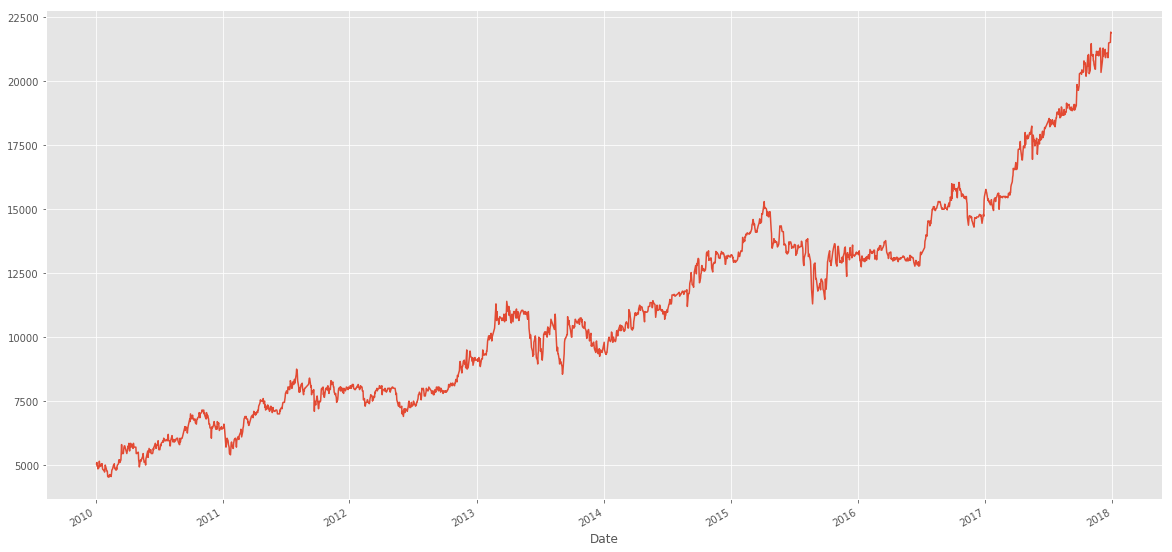

In [59]:
close.plot()

In [88]:
close_df = close.reset_index().rename(columns={'Date':'ds', 'Close':'y'})
close_df['y'] = np.log(close_df['y'])

In [89]:
model = Prophet()
model.fit(close_df)
future = model.make_future_dataframe(periods=1825) #forecasting for 1 year from now.
forecast = model.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/doni/anaconda3/envs/stock-ticker/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


('2017', '2020', 8, 12)

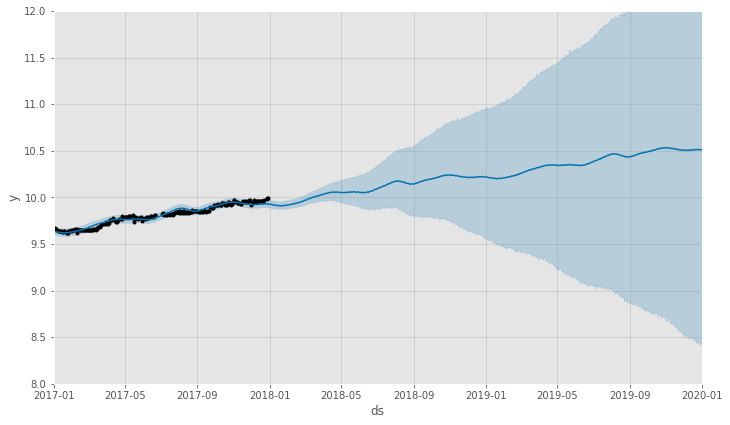

In [90]:
model.plot(forecast)
plt.axis(('2017', '2020', 8, 12))

In [101]:
two_years = forecast.set_index('ds').join(df)
two_years = two_years[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)

In [102]:
two_years

,Close,yhat,yhat_upper,yhat_lower
ds,,,,
2014-09-18,12550.0,12236.724504,12767.641218,11786.483158
2014-09-19,12600.0,12246.352826,12719.706297,11749.351543
2014-09-22,12800.0,12297.322885,12838.240054,11806.644530
2014-09-23,12650.0,12332.185367,12838.647169,11846.429885
2014-09-24,12475.0,12373.432495,12885.304835,11865.718521
2014-09-25,12875.0,12397.765578,12948.348874,11932.604631
2014-09-26,12800.0,12400.985095,12895.230403,11940.777604
2014-09-29,13075.0,12439.121316,12969.228525,11936.112376
2014-09-30,13075.0,12472.307508,12964.939099,12001.252916


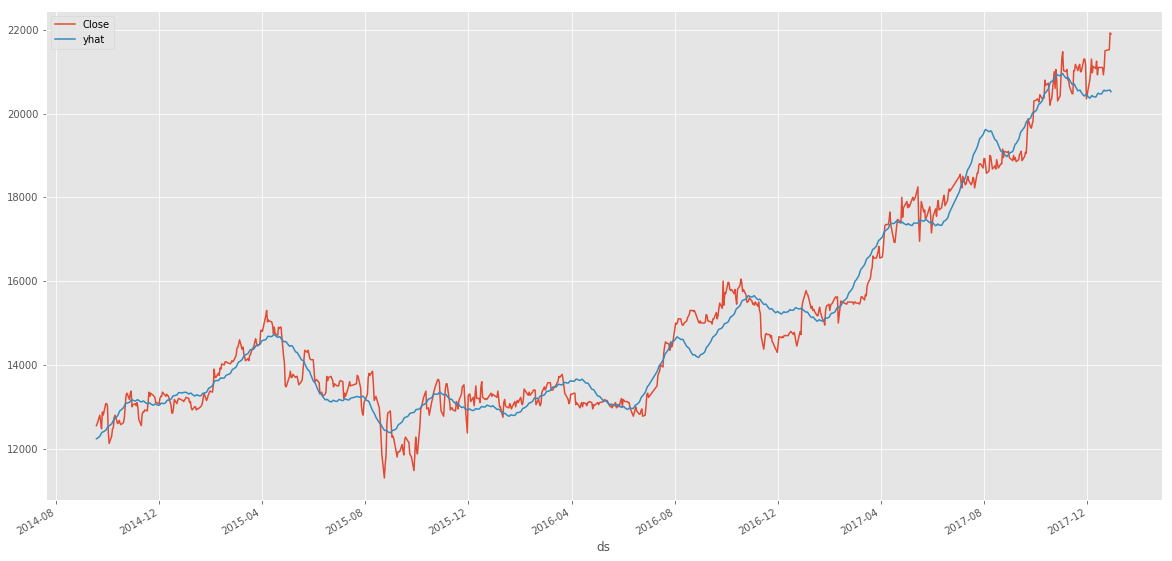

In [66]:
two_years[['Close', 'yhat']].plot()



In [71]:
two_years_AE = (two_years.yhat - two_years.Close)
print(two_years_AE.describe())



count     800.000000
mean       -6.881934
std       432.088553
min     -1379.206012
25%      -301.987250
50%       -52.553499
75%       269.455146
max      1391.218385
dtype: float64


In [72]:
r2_score(two_years.Close, two_years.yhat)

0.9701134950658992

In [73]:
mean_squared_error(two_years.Close, two_years.yhat)

186514.50263544673

In [75]:
mean_absolute_error(two_years.Close, two_years.yhat)

349.82063270554585

Text(0.5,0,'Date')

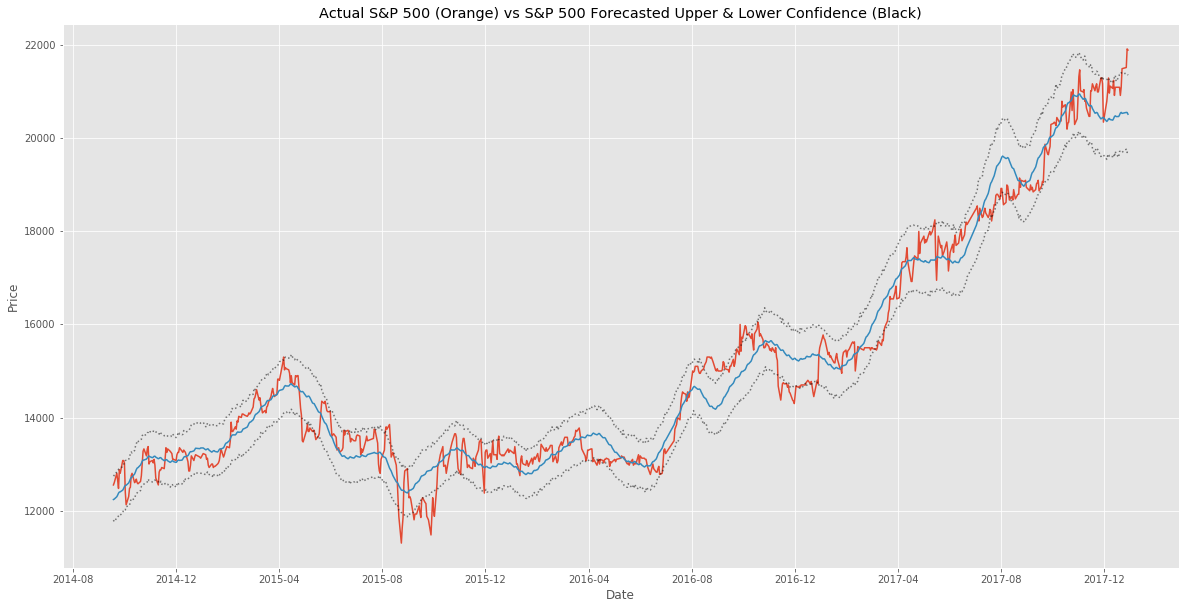

In [76]:
fig, ax1 = plt.subplots()
ax1.plot(two_years.Close)
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)

ax1.set_title('Actual S&P 500 (Orange) vs S&P 500 Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

In [77]:
forecast

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2010-01-04,8.525110,8.525110,8.525110,8.453056,8.534071,-0.031790,-0.031790,-0.031790,-0.031790,-0.031790,-0.031790,-0.000832,-0.000832,-0.000832,-0.030958,-0.030958,-0.030958,8.493320
1,2010-01-05,8.525830,8.525830,8.525830,8.455448,8.531061,-0.032661,-0.032661,-0.032661,-0.032661,-0.032661,-0.032661,0.000230,0.000230,0.000230,-0.032890,-0.032890,-0.032890,8.493169
2,2010-01-06,8.526550,8.526550,8.526550,8.453917,8.538084,-0.032993,-0.032993,-0.032993,-0.032993,-0.032993,-0.032993,0.001867,0.001867,0.001867,-0.034861,-0.034861,-0.034861,8.493556
3,2010-01-07,8.527270,8.527270,8.527270,8.452902,8.531186,-0.034665,-0.034665,-0.034665,-0.034665,-0.034665,-0.034665,0.002185,0.002185,0.002185,-0.036850,-0.036850,-0.036850,8.492605
4,2010-01-08,8.527990,8.527990,8.527990,8.448012,8.527393,-0.038003,-0.038003,-0.038003,-0.038003,-0.038003,-0.038003,0.000837,0.000837,0.000837,-0.038840,-0.038840,-0.038840,8.489987
5,2010-01-11,8.530151,8.530151,8.530151,8.444314,8.526303,-0.045459,-0.045459,-0.045459,-0.045459,-0.045459,-0.045459,-0.000832,-0.000832,-0.000832,-0.044627,-0.044627,-0.044627,8.484692
6,2010-01-12,8.530871,8.530871,8.530871,8.445812,8.525217,-0.046205,-0.046205,-0.046205,-0.046205,-0.046205,-0.046205,0.000230,0.000230,0.000230,-0.046434,-0.046434,-0.046434,8.484666
7,2010-01-13,8.531591,8.531591,8.531591,8.441393,8.523686,-0.046286,-0.046286,-0.046286,-0.046286,-0.046286,-0.046286,0.001867,0.001867,0.001867,-0.048153,-0.048153,-0.048153,8.485304
8,2010-01-14,8.532311,8.532311,8.532311,8.449108,8.525332,-0.047585,-0.047585,-0.047585,-0.047585,-0.047585,-0.047585,0.002185,0.002185,0.002185,-0.049770,-0.049770,-0.049770,8.484726
9,2010-01-15,8.533031,8.533031,8.533031,8.442154,8.525965,-0.050434,-0.050434,-0.050434,-0.050434,-0.050434,-0.050434,0.000837,0.000837,0.000837,-0.051271,-0.051271,-0.051271,8.482597
